In [ ]:
%pip install yfinance

In [ ]:
%pip install panda

  Preparing metadata (setup.py) ... done
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7239 sha256=530357121112f91a382115e0382341c7baf0f508ccec73cf38f19740d961b3d5
  Stored in directory: /root/.cache/pip/wheels/0e/8b/c3/ff9cbde1fffd8071cff8367a86f0350a1ce30a8d31b6a432e9
Successfully built panda


In [ ]:
import yfinance as yf
import pandas as pd

# 追蹤股票標的
# 台股台積電
tsm = '2330.TW'
#美股 Arm Holdings plc (ARM)
TSM = 'TSM'
def get_historical_data(ticker):
  d = yf.Ticker(ticker) # 定義 Ticker 物件
  df = d.history(period="5d") #最近7天
  df.columns = df.columns.str.lower()
  df.columns = pd.Series(df.columns).str.capitalize().values
  return df.dropna()

df = get_historical_data(tsm)
df

,Open,High,Low,Close,Volume,Dividends,Stock splits
Date,,,,,,,
2024-05-20 00:00:00+08:00,834.0,838.0,822.0,835.0,28808661,0.0,0.0
2024-05-21 00:00:00+08:00,830.0,841.0,830.0,841.0,19705349,0.0,0.0
2024-05-22 00:00:00+08:00,845.0,865.0,843.0,864.0,36628342,0.0,0.0
2024-05-23 00:00:00+08:00,875.0,877.0,867.0,875.0,37266618,0.0,0.0
2024-05-24 00:00:00+08:00,858.0,872.0,858.0,867.0,35078085,0.0,0.0


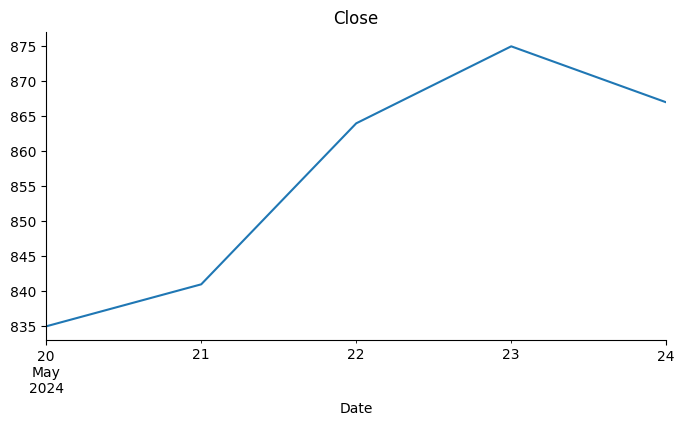

In [ ]:
# @title Close

from matplotlib import pyplot as plt
df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

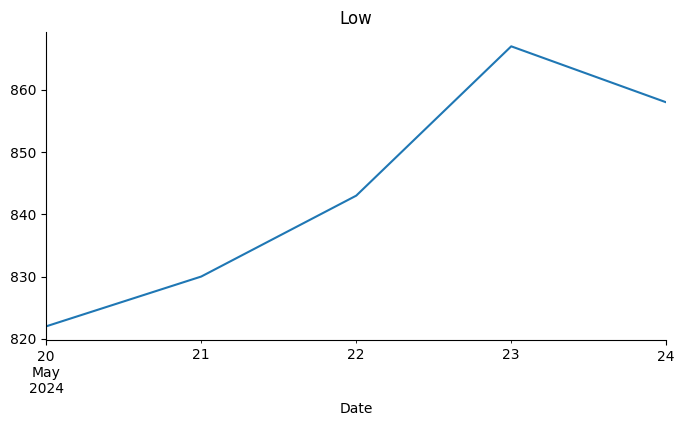

In [ ]:
# @title Low

from matplotlib import pyplot as plt
df['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

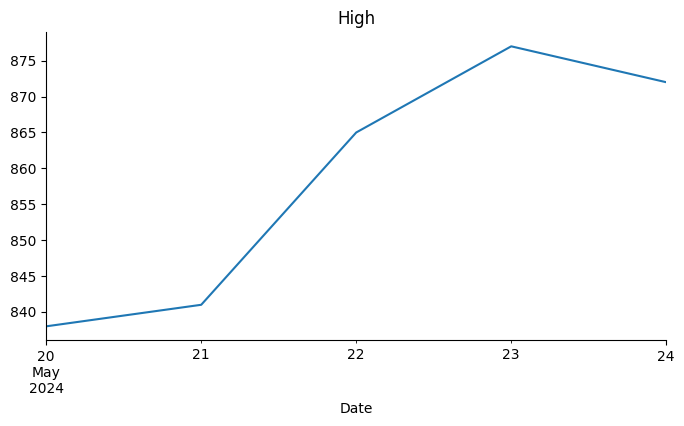

In [ ]:
# @title High

from matplotlib import pyplot as plt
df['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

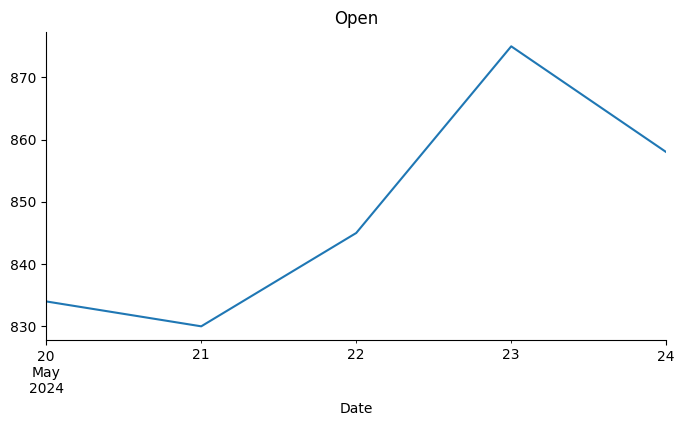

In [ ]:
# @title Open

from matplotlib import pyplot as plt
df['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

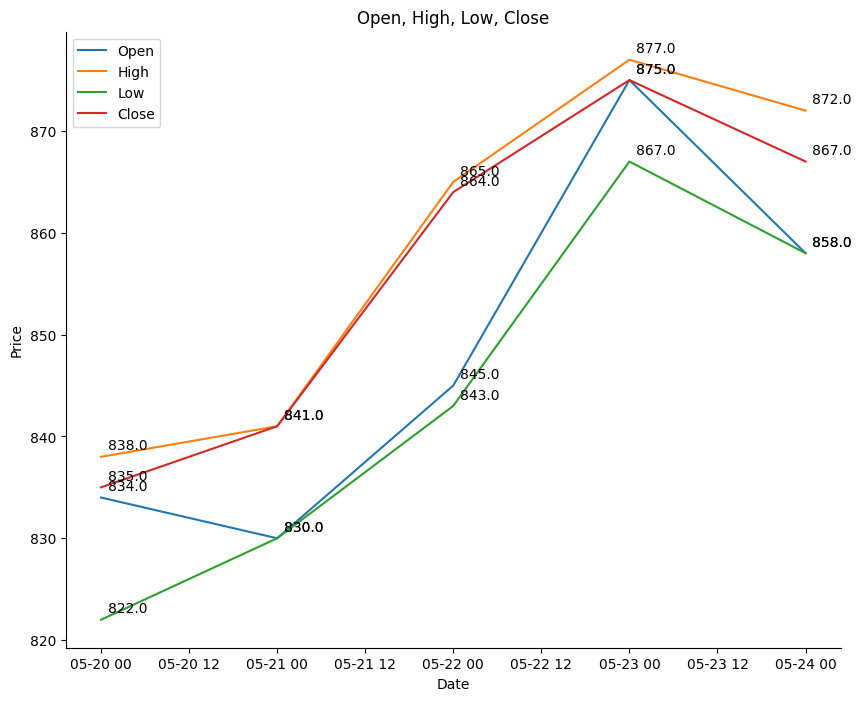

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設您已經有一個DataFrame df,包含Open、High、Low和Close這些欄位

# 繪製圖表
fig, ax = plt.subplots(figsize=(10, 8))

# 繪製四條線
open_line, = ax.plot(df.index, df['Open'], label='Open')
high_line, = ax.plot(df.index, df['High'], label='High')
low_line, = ax.plot(df.index, df['Low'], label='Low')
close_line, = ax.plot(df.index, df['Close'], label='Close')

# 在轉折點顯示股票價格
for x, y in zip(df.index, df['Open']):
    if y != df['Open'].shift(1)[x]:
        ax.annotate(y, xy=(x, y), xytext=(5, 5), textcoords='offset points')

for x, y in zip(df.index, df['High']):
    if y != df['High'].shift(1)[x]:
        ax.annotate(y, xy=(x, y), xytext=(5, 5), textcoords='offset points')

for x, y in zip(df.index, df['Low']):
    if y != df['Low'].shift(1)[x]:
        ax.annotate(y, xy=(x, y), xytext=(5, 5), textcoords='offset points')

for x, y in zip(df.index, df['Close']):
    if y != df['Close'].shift(1)[x]:
        ax.annotate(y, xy=(x, y), xytext=(5, 5), textcoords='offset points')

# 設置標題和軸標籤
ax.set_title('Open, High, Low, Close')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

# 添加圖例
ax.legend(handles=[open_line, high_line, low_line, close_line])

# 去除上方和右方的刻度線
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 顯示圖表
plt.show()